# **House Prices - Homework 2**

@Yevheniia-Rudenko

05/04/2025


based on [Kaggle House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

***

In [1]:
# Import necessary libraries for data manipulation, visualization, and modeling

import pandas as pd  # For handling and manipulating tabular data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For more advanced and visually appealing plots (built on matplotlib)

from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # For applying linear regression modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.preprocessing import StandardScaler



***

# Loading Data

In [2]:
# Load the training and test datasets from CSV files

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

***
# Data Exploration


In [3]:
# Display a concise summary of the training DataFrame,
# including the number of non-null entries, column data types, and memory usage

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Display a summary of the test DataFrame,
# useful for understanding its structure and checking for missing values

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
# Display all column names in the training DataFrame
# Useful for exploring available features and selecting relevant ones

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

***
# Linear regression

In [6]:
# Create a copy of the original DataFrame to avoid modifying the original one
linear_train = train.copy()

# Filling missing values in the "GrLivArea" and "SalePrice" columns with their median values
# Instead of using inplace=True, directly assign the result to the column
linear_train["GrLivArea"] = linear_train["GrLivArea"].fillna(linear_train["GrLivArea"].median())
linear_train["SalePrice"] = linear_train["SalePrice"].fillna(linear_train["SalePrice"].median())



Text(0.5, 1.0, 'Boxplot for GrLivArea')

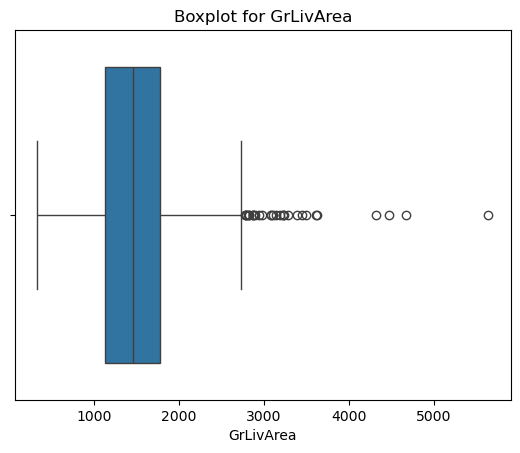

In [7]:
# Visualizing outliers for "GrLivArea" using a boxplot
# This helps identify extreme values that might need to be removed or analyzed further
sns.boxplot(x=linear_train["GrLivArea"])
plt.title("Boxplot for GrLivArea")

In [8]:
# Calculating the Interquartile Range (IQR) for the "GrLivArea" column to detect outliers
# Q1 is the 25th percentile, Q3 is the 75th percentile, and IQR is the difference between them
# Rows with "GrLivArea" values outside of the acceptable range (1.5 * IQR above Q3 or below Q1) are considered outliers and are removed
Q1 = linear_train["GrLivArea"].quantile(0.25)
Q3 = linear_train["GrLivArea"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

linear_train = linear_train[(linear_train["GrLivArea"] >= lower_bound) & (linear_train["GrLivArea"] <= upper_bound)]


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

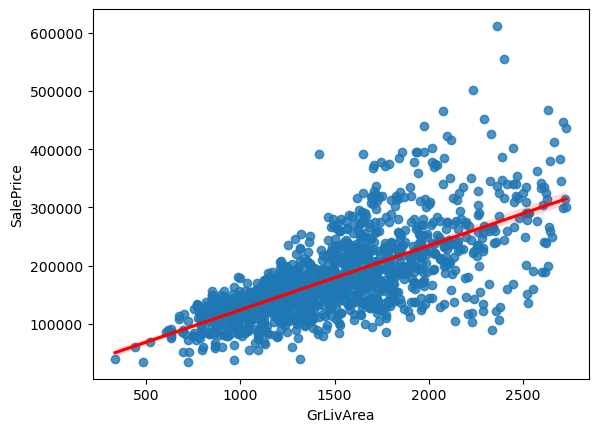

In [9]:
# Creating a scatter plot with a regression line to visualize the relationship between "GrLivArea" and "SalePrice"

sns.regplot(data = linear_train, x = "GrLivArea", y = "SalePrice", line_kws = {"color" : "red"})

In [10]:
# Defining the feature matrix "X" (GrLivArea) and target variable "y" (SalePrice) for model training

X = linear_train[["GrLivArea"]]
y = linear_train["SalePrice"]


In [11]:
# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initializing the linear regression model
model = LinearRegression()

# Fitting the model to the training data (X_train and y_train) to learn the relationship between the feature and target variable
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Making predictions on the test set using the trained model
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE), R-squared (R2), and Mean Absolute Error (MAE) to evaluate the model's performance
# MSE measures the average squared difference between actual and predicted values
# R2 indicates the proportion of variance in the target variable explained by the model
# MAE shows the average absolute difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the evaluation metrics to assess the model's accuracy
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2767217489.6504364
R-squared: 0.4179107158036821
Mean Absolute Error: 38054.63535569652


## Model Evaluation:

The model's performance suggests that using only "GrLivArea" to predict "SalePrice" is not sufficient, as indicated by the low R² (0.42) and high MSE and MAE. This implies that other factors likely influence the sale price, and adding more features or trying different models could improve predictions.

***


# Multiple Linear regression 

In [14]:
# Create a copy of the original DataFrame to avoid modifying the original one
multiple_linear_train = train.copy()

In [15]:
#Check the missing values in the dataset
missing_values = multiple_linear_train.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [16]:
# Drop columns where more than 30% of the data is missing
multiple_linear_train.dropna(thresh=train.shape[0] * 0.7, axis=1, inplace=True)


In [17]:
#Check the missing values in the dataset
missing_values = multiple_linear_train.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [18]:
# Fill missing values in numerical columns with the median
for col in ["LotFrontage", "MasVnrArea", "GarageYrBlt"]:
    multiple_linear_train[col] = multiple_linear_train[col].fillna(multiple_linear_train[col].median())

# Fill missing values in categorical columns with a relevant category
basement_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in basement_cols:
    multiple_linear_train[col] = multiple_linear_train[col].fillna("No Basement")

garage_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in garage_cols:
    multiple_linear_train[col] = multiple_linear_train[col].fillna("No Garage")


# Fill missing values in Electrical column with mode
multiple_linear_train["Electrical"] = multiple_linear_train["Electrical"].fillna(multiple_linear_train["Electrical"].mode()[0])



In [19]:
# Check if there are any remaining missing values
missing_values_after = multiple_linear_train.isnull().sum()
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


In [20]:
# Drop the "Id" column as it is not needed for prediction
multiple_linear_train.drop(columns=['Id'], inplace=True)

In [21]:
# Define the features (X) and target (y)
X = multiple_linear_train.drop(columns=["SalePrice"])  # All features except SalePrice
y = multiple_linear_train["SalePrice"]  # Target variable

X_encoded = pd.get_dummies(X, drop_first=True)


Text(0.5, 1.0, 'Correlation Matrix (Before Feature Selection)')

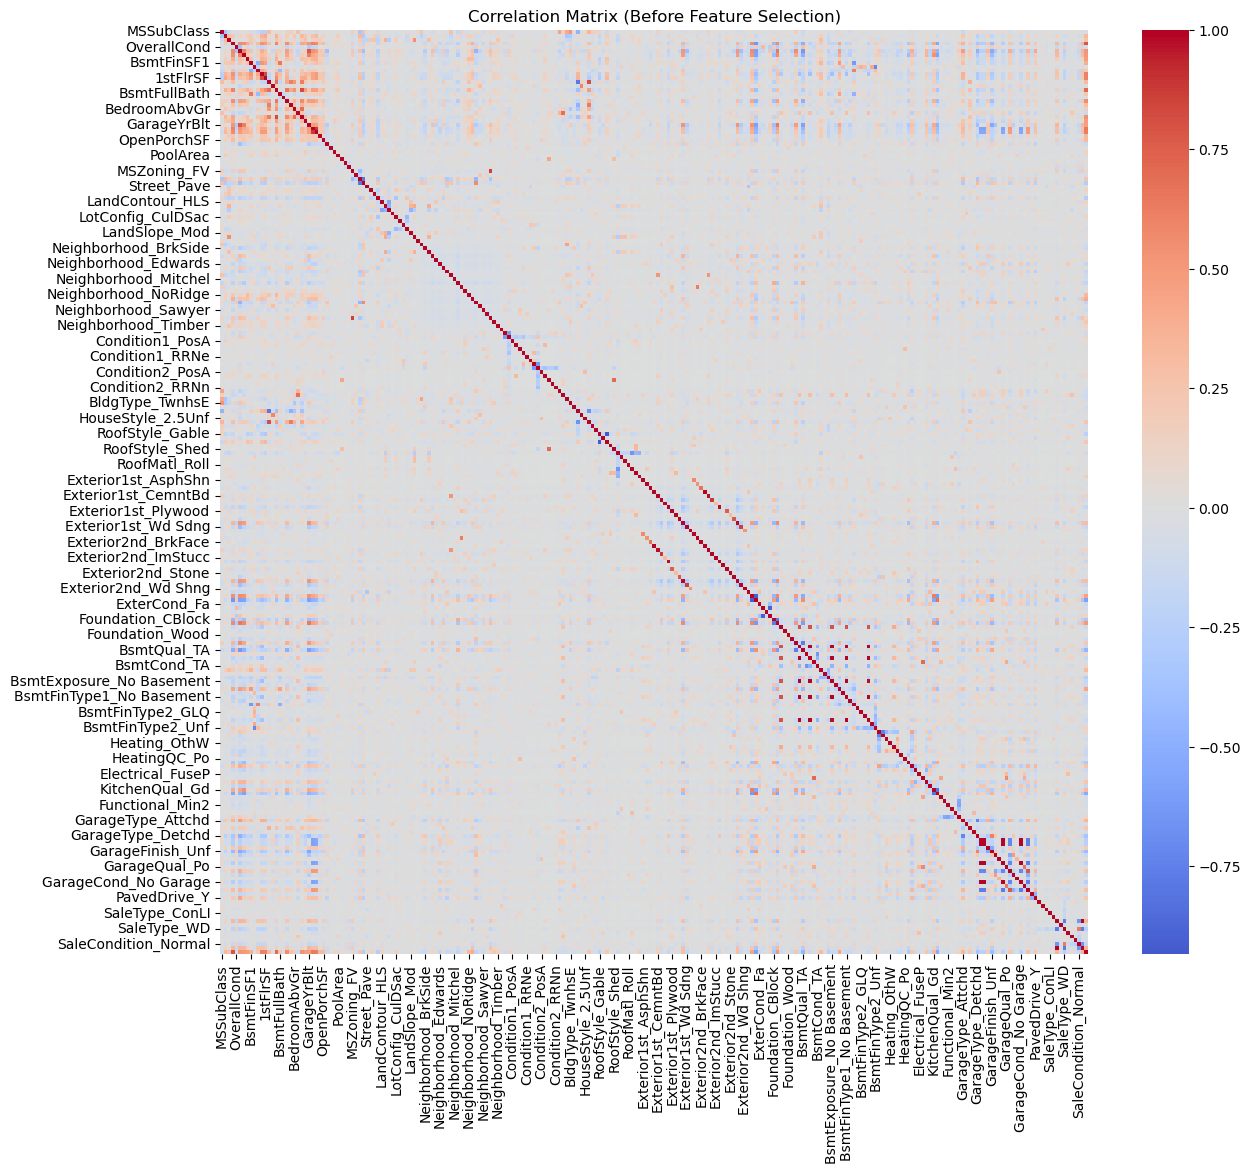

In [22]:
# Add the target variable 'SalePrice' back to the dataset for correlation analysis
X_with_target = X_encoded.copy()  
X_with_target["SalePrice"] = y  

# Generate the full correlation matrix and visualize it using a heatmap
plt.figure(figsize=(14, 12))  
sns.heatmap(X_with_target.corr(), cmap='coolwarm', center=0, cbar=True) 
plt.title('Correlation Matrix (Before Feature Selection)')  

Text(0.5, 1.0, 'Correlation of Strong Features with SalePrice (After Feature Selection)')

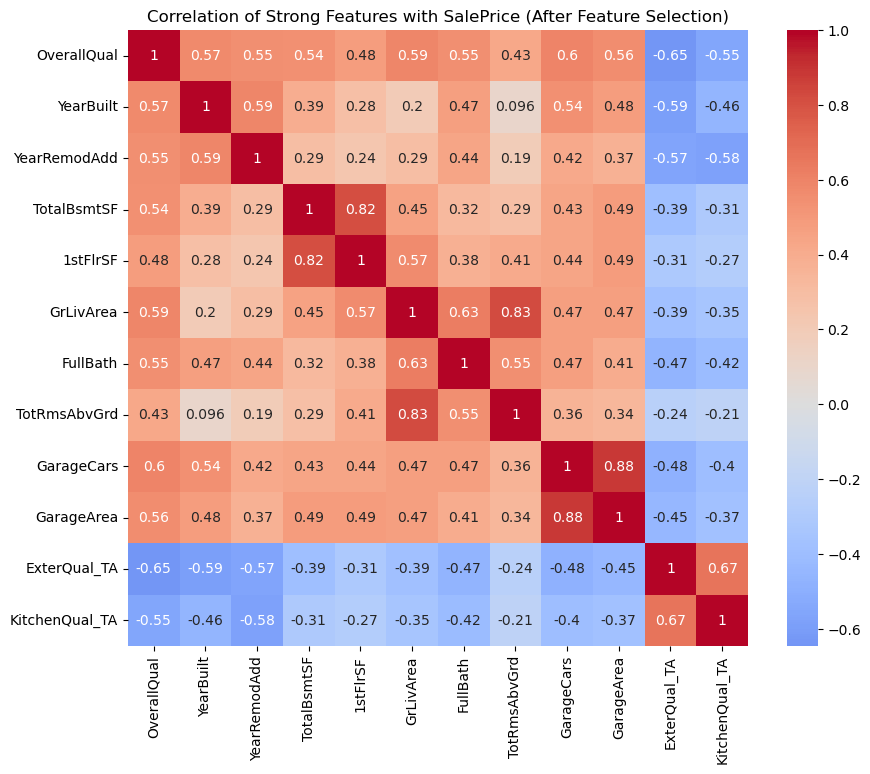

In [23]:
# Feature Selection: Select only the features with strong correlation to 'SalePrice'
corr_with_target = X_with_target.corr()["SalePrice"].drop("SalePrice")  # Calculate the correlation of each feature with 'SalePrice', excluding 'SalePrice' itself
top_features = corr_with_target[abs(corr_with_target) > 0.5].index  # Select features with an absolute correlation greater than 0.5

# Visualize the correlation matrix of selected features with 'SalePrice'
plt.figure(figsize=(10, 8)) 
sns.heatmap(X_with_target[top_features].corr(), annot=True, cmap='coolwarm', center=0)  
plt.title('Correlation of Strong Features with SalePrice (After Feature Selection)') 


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded[top_features], y, test_size=0.2, random_state=42)


In [25]:
# Create the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [26]:
# Predict SalePrice using the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 1559299894.954655
R-squared (R²): 0.7967100938297011
Mean Absolute Error (MAE): 24715.821797225548


## Conclusion:
By using more features, the model's ability to predict the target (SalePrice) improved, as demonstrated by the increased R² and the decreased MSE and MAE. This shows the importance of incorporating all relevant features to improve the performance of linear regression models.